In [1]:
import torch
import torch.nn as nn
from torchsummary import summary
from torchview import draw_graph

## VGG


### What is VGG?
VGG (Visual Geometry Group) is a popular deep convolutional neural network (CNN) architecture developed by the Visual Geometry Group at the University of Oxford. VGGNet is known for its simplicity and effectiveness in image classification tasks. It consists of multiple convolutional layers followed by fully connected layers. The most common variant, VGG-16, has 16 layers, including 13 convolutional layers and 3 fully connected layers. VGGNet has achieved impressive results on various image classification benchmarks, including the ImageNet challenge.

### Parameters

in_channels (int) – Number of channels in the input image

out_channels (int) – Number of channels produced by the convolution

kernel_size (int or tuple) – Size of the convolving kernel

stride (int or tuple, optional) – Stride of the convolution. Default: 1

padding (int, tuple or str, optional) – Padding added to all four sides of the input. Default: 0

padding_mode (str, optional) – 'zeros', 'reflect', 'replicate' or 'circular'. Default: 'zeros'

dilation (int or tuple, optional) – Spacing between kernel elements. Default: 1

groups (int, optional) – Number of blocked connections from input channels to output channels. Default: 1

bias (bool, optional) – If True, adds a learnable bias to the output. Default: True

In [2]:
class VGG16(nn.Module):
    def __init__(self, num_classes=1000):
        super(VGG16, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7 * 16, 4096), nn.ReLU(True), nn.Dropout(),
            nn.Linear(4096, 4096), nn.ReLU(True), nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        layer_outputs = []

        x = self.features[0](x)
        layer_outputs.append(x)

        x = self.features[1](x)
        layer_outputs.append(x)

        x = self.features[2](x)
        layer_outputs.append(x)

        x = self.features[3](x)
        layer_outputs.append(x)

        x = self.features[4](x)
        layer_outputs.append(x)

        x = self.features[5](x)
        layer_outputs.append(x)

        x = self.features[6](x)
        layer_outputs.append(x)

        x = self.features[7](x)
        layer_outputs.append(x)

        x = self.features[8](x)
        layer_outputs.append(x)

        x = self.features[9](x)
        layer_outputs.append(x)

        x = self.features[10](x)
        layer_outputs.append(x)

        x = self.features[11](x)
        layer_outputs.append(x)

        x = self.features[12](x)
        layer_outputs.append(x)

        x = self.features[13](x)
        layer_outputs.append(x)

        x = self.features[14](x)
        layer_outputs.append(x)

        x = self.features[15](x)
        layer_outputs.append(x)

        x = self.features[16](x)
        layer_outputs.append(x)

        x = self.features[17](x)
        layer_outputs.append(x)

        x = x.view(x.size(0), -1)

        x = self.classifier[0](x)
        layer_outputs.append(x)  # Output after first fully connected layer

        x = self.classifier[1](x)
        layer_outputs.append(x)  # Output after second fully connected layer

        x = self.classifier[2](x)
        layer_outputs.append(x)  # Final output layer

        return x, layer_outputs

In [3]:
x = (3, 224, 224)
VGG16  = VGG16(num_classes=10)
summary(VGG16, x)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

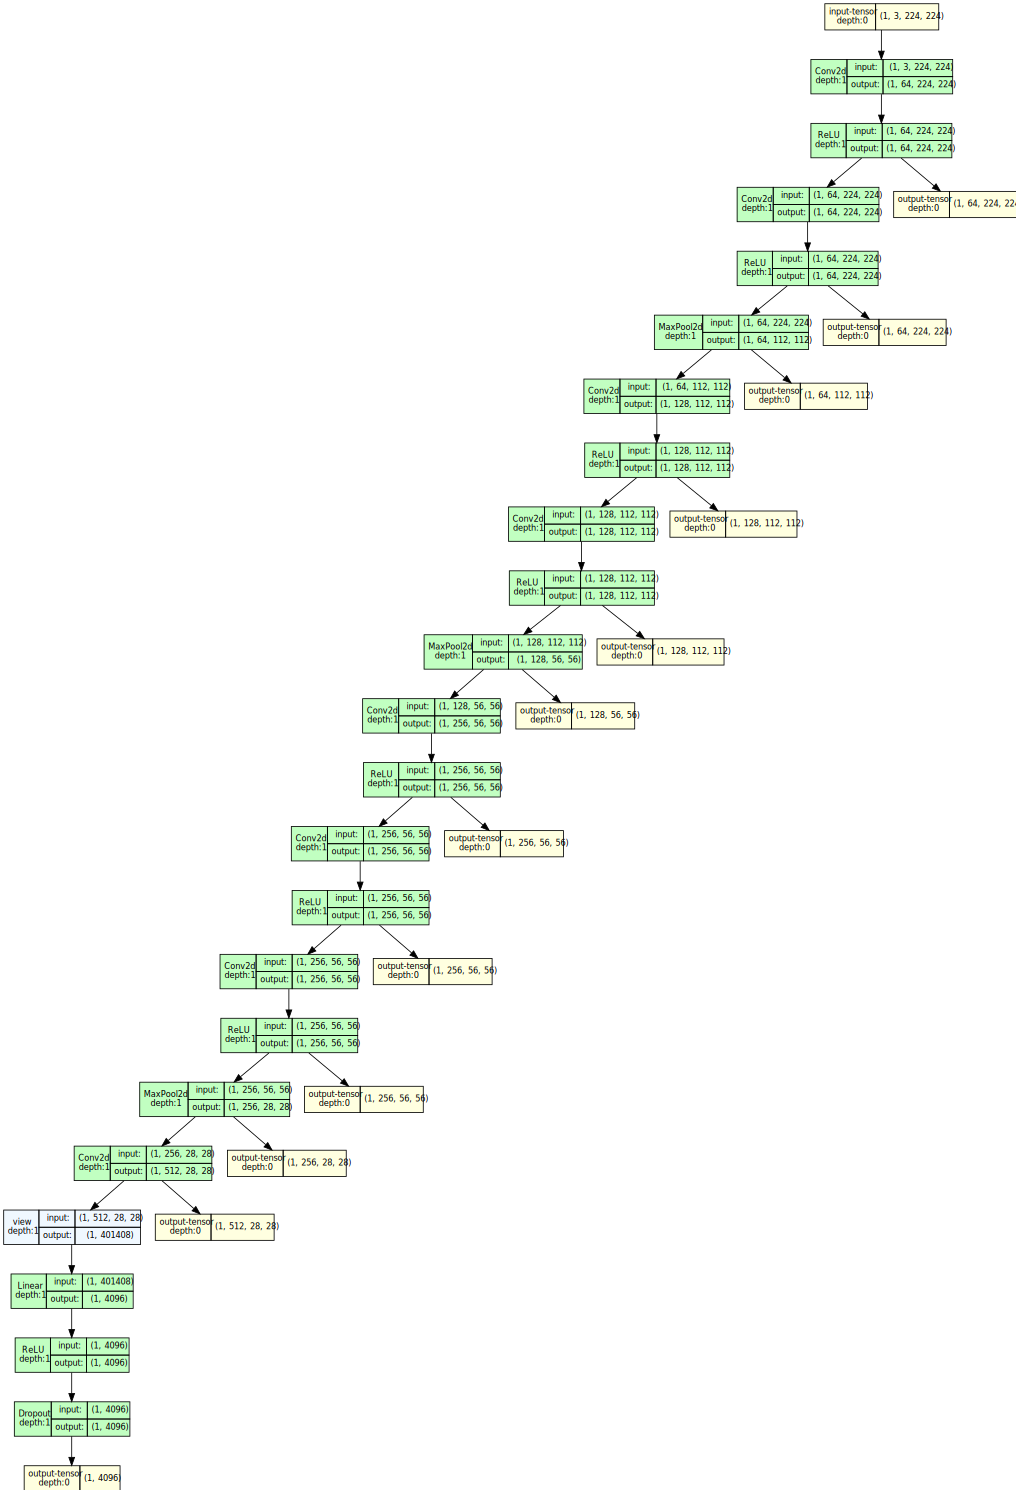

In [4]:
batch_size = 1
# device='meta' -> no memory is consumed for visualization
model_graph = draw_graph(VGG16, input_size=(batch_size, 3, 224, 224), device='meta')
model_graph.visual_graph